In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('spam.csv' , encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.rename(columns = {"v1" : "Label" , "v2": "Text"} , inplace = True)

In [4]:
data.drop(['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True , axis = 1)

In [5]:
data.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.shape

(5572, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.isna().sum()

Label    0
Text     0
dtype: int64

In [9]:
data.duplicated().sum()

403

In [10]:
data.drop_duplicates(inplace = True)

In [11]:
data.duplicated().sum()

0

<AxesSubplot: ylabel='Label'>

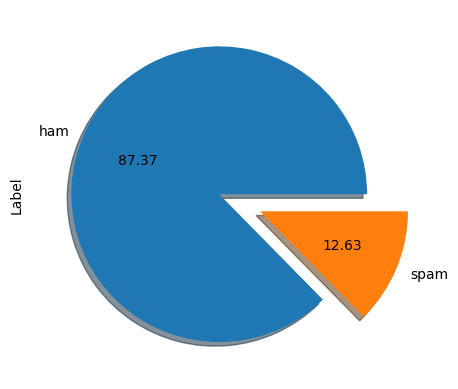

In [12]:
data.Label.value_counts().plot(kind = 'pie' , autopct = '%0.2f' , explode = [0 ,0.3] , shadow = True)

In [13]:
def no(x):
    return len(x.split(" "))

data['No_of_words'] = data.Text.apply(no)

In [14]:
data.head()

,Label,Text,No_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords


C:\Users\Dell\AppData\Local\Temp\ipykernel_14864\2193520909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['No_of_words'][data['Label'] == 'ham'] , label = 'ham')
C:\Users\Dell\AppData\Local\Temp\ipykernel_14864\2193520909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['No_of

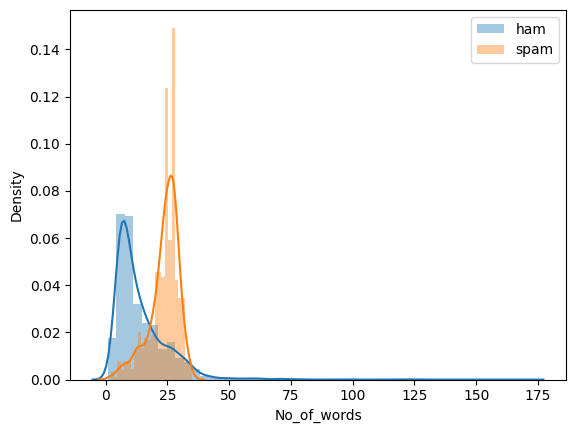

In [16]:
import seaborn as sns
sns.distplot(data['No_of_words'][data['Label'] == 'ham'] , label = 'ham')
sns.distplot(data['No_of_words'][data['Label'] == 'spam'] , label = 'spam')
plt.legend()
plt.show()

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud

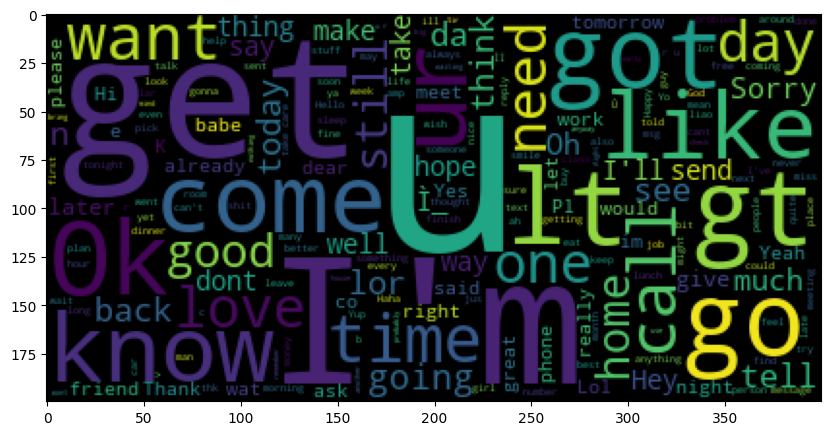

In [19]:
plt.figure(figsize = (10 , 10))
plt.imshow(WordCloud(background_color='black' , stopwords=set(stopwords.words('english'))).generate(" ".join(data['Text'][data['Label'] == 'ham'])))

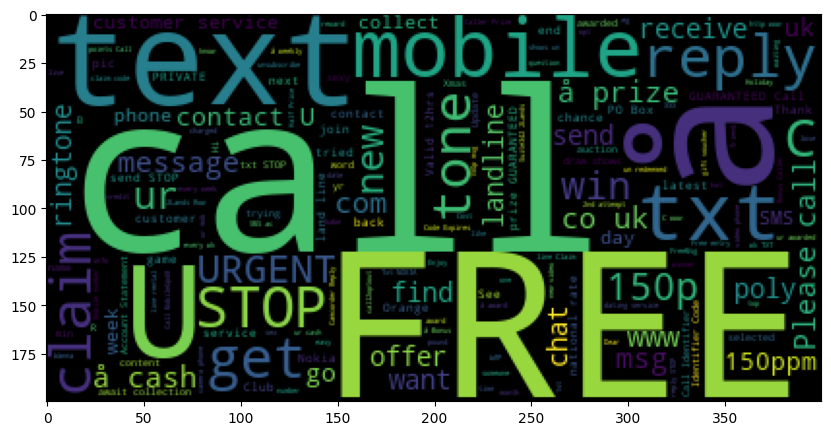

In [20]:
plt.figure(figsize = (10 , 10))
plt.imshow(WordCloud(background_color='black' , stopwords=set(stopwords.words('english'))).generate(" ".join(data['Text'][data['Label'] == 'spam'])))

In [21]:
for i in range(10):
    print(i , " : ", data.Text[i])

0  :  Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1  :  Ok lar... Joking wif u oni...
2  :  Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3  :  U dun say so early hor... U c already then say...
4  :  Nah I don't think he goes to usf, he lives around here though
5  :  FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
6  :  Even my brother is not like to speak with me. They treat me like aids patent.
7  :  As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8  :  WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 h

In [22]:
import re
def clean(x):
    return re.sub('[^a-zA-Z0-9]' , " " , x).lower()

data.Text = data.Text.apply(clean)

In [23]:
for i in range(10):
    print(i , " : ", data.Text[i])

0  :  go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   
1  :  ok lar    joking wif u oni   
2  :  free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005  text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3  :  u dun say so early hor    u c already then say   
4  :  nah i don t think he goes to usf  he lives around here though
5  :  freemsg hey there darling it s been 3 week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send    1 50 to rcv
6  :  even my brother is not like to speak with me  they treat me like aids patent 
7  :  as per your request  melle melle  oru minnaminunginte nurungu vettam   has been set as your callertune for all callers  press  9 to copy your friends callertune
8  :  winner   as a valued network customer you have been selected to receivea   900 prize reward  to claim call 09061701461  claim code kl341  valid 12 h

In [24]:
from nltk.stem import WordNetLemmatizer
w = WordNetLemmatizer()
def clean2(x):
    new = []
    for i in x.split(" "):
        if len(i) > 2 and i not in stopwords.words('english'):
            new.append(w.lemmatize(i))
            
    return " ".join(new)

data.Text = data.Text.apply(clean2)
            
        

In [25]:
x = data.Text
y = data.Label


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB , MultinomialNB
from sklearn.metrics import accuracy_score , precision_score , recall_score

In [27]:
label = LabelEncoder()
y = label.fit_transform(y)

In [28]:
bag_of_words = CountVectorizer(max_features=1000 , ngram_range=(1, 2))
x_count = bag_of_words.fit_transform(x).todense()

In [29]:
tfidf = TfidfVectorizer(max_features=1000 , ngram_range=(1, 2))
x_tfidf = tfidf.fit_transform(x).todense()

In [30]:
all_model_dict = {
    "randomforest" : RandomForestClassifier(),
    "gradient" : GradientBoostingClassifier(),
    "adaboost" : AdaBoostClassifier(),
    "svc" : SVC(),
    "logistic" : LogisticRegression(),
    "gaussian" : GaussianNB(),
    "multinomial" : MultinomialNB()   
}

In [31]:

def train_models(models , xt , yt , xte , yte):
    for i in models:
        ypred = 0
        models[i].fit(np.asarray(xt) , yt)
        ypred = models[i].predict(np.asarray(xte))
        print(f"{i} : \n\t accuracy score {accuracy_score(yte , ypred)} \n\t precision score {precision_score(yte , ypred)} \n\t recall score {recall_score(yte , ypred)}")
        

In [32]:
# By bag of words
xtrain , xtest , ytrain , ytest = train_test_split(x_count,y , test_size = 0.2 , random_state = 42)

In [33]:
train_models(all_model_dict , xtrain , ytrain , xtest , ytest)

randomforest : 
	 accuracy score 0.9796905222437138 
	 precision score 0.9920634920634921 
	 recall score 0.8620689655172413
gradient : 
	 accuracy score 0.9690522243713733 
	 precision score 0.9747899159663865 
	 recall score 0.8
adaboost : 
	 accuracy score 0.9593810444874274 
	 precision score 0.8814814814814815 
	 recall score 0.8206896551724138
svc : 
	 accuracy score 0.9787234042553191 
	 precision score 0.984251968503937 
	 recall score 0.8620689655172413
logistic : 
	 accuracy score 0.9796905222437138 
	 precision score 0.984375 
	 recall score 0.8689655172413793
gaussian : 
	 accuracy score 0.758220502901354 
	 precision score 0.35924932975871315 
	 recall score 0.9241379310344827
multinomial : 
	 accuracy score 0.9729206963249516 
	 precision score 0.8874172185430463 
	 recall score 0.9241379310344827


In [70]:
# By Tfidf
# By bag of words
xtrain1 , xtest1 , ytrain1 , ytest1 = train_test_split(x_tfidf,y , test_size = 0.2 , random_state = 42)
train_models(all_model_dict , xtrain1 , ytrain1 , xtest1 , ytest1)

randomforest : 
	 accuracy score 0.97678916827853 
	 precision score 0.9689922480620154 
	 recall score 0.8620689655172413
gradient : 
	 accuracy score 0.965183752417795 
	 precision score 0.9504132231404959 
	 recall score 0.7931034482758621
adaboost : 
	 accuracy score 0.9700193423597679 
	 precision score 0.9384615384615385 
	 recall score 0.8413793103448276
svc : 
	 accuracy score 0.9806576402321083 
	 precision score 0.9844961240310077 
	 recall score 0.8758620689655172
logistic : 
	 accuracy score 0.9700193423597679 
	 precision score 0.975 
	 recall score 0.8068965517241379
gaussian : 
	 accuracy score 0.7736943907156673 
	 precision score 0.3753501400560224 
	 recall score 0.9241379310344827
multinomial : 
	 accuracy score 0.9748549323017408 
	 precision score 0.9541984732824428 
	 recall score 0.8620689655172413


In [35]:
# Let's go towards the deep learning part

In [36]:
data.Text

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts 21st m...
3                           dun say early hor already say
4                     nah think go usf life around though
                              ...                        
5567    2nd time tried contact 750 pound prize claim e...
5568                                 going esplanade home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [37]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , LSTM , Bidirectional , Embedding , SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
tokenize_x = tokenizer.texts_to_sequences(x)
final_vocab = len(tokenizer.word_index) + 1
max_len = max([len(i) for i in x])

final_x = pad_sequences(tokenize_x , maxlen = max_len , padding = 'post')

In [40]:
final_x.shape

(5169, 442)

In [41]:
xtr , xtes , ytr , ytes = train_test_split(final_x , y, test_size =0.2 , random_state = 42)

In [42]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

def early():
    return EarlyStopping(monitor = 'val_loss' , patience = 3 , min_delta = 0.001 , restore_best_weights = True )

def point(path):
    return ModelCheckpoint(path , save_best_only = True , save_weights_only = True , save_freq = 'epoch' , monitor = 'val_loss')

In [55]:
model = Sequential()
model.add(Embedding(final_vocab , 128 , input_length = max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(32 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' ,optimizer = "Adam" , metrics = ['accuracy'])

history1 = model.fit(np.asarray(xtr) , ytr , epochs = 10 , validation_data = (np.asarray(xtes) , ytes) , callbacks = [early() , point('model.ckpt')])

Epoch 1/10
130/130 [==============================] - 44s 303ms/step - loss: 0.1843 - accuracy: 0.9429 - val_loss: 0.0453 - val_accuracy: 0.9845
Epoch 2/10
130/130 [==============================] - 43s 334ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.0513 - val_accuracy: 0.9855
Epoch 3/10
130/130 [==============================] - 43s 327ms/step - loss: 0.0089 - accuracy: 0.9978 - val_loss: 0.0590 - val_accuracy: 0.9797
Epoch 4/10
130/130 [==============================] - 43s 329ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0630 - val_accuracy: 0.9787


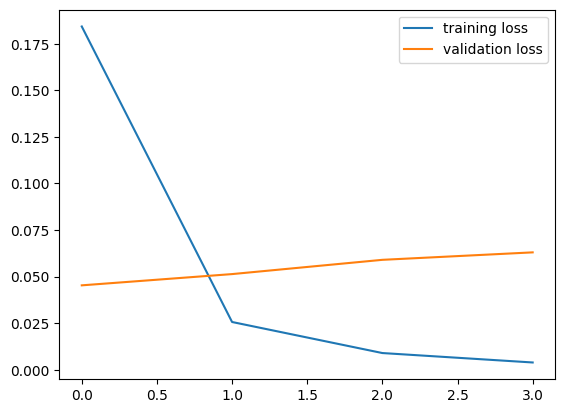

In [56]:
plt.plot(history1.history['loss'] , label = 'training loss')
plt.plot(history1.history['val_loss'] ,label = 'validation loss')
plt.legend()
plt.show()

In [57]:
# Let's load the best weights

In [58]:
model.load_weights('model.ckpt')

In [59]:
model.evaluate(xtes , ytes)

33/33 [==============================] - 2s 62ms/step - loss: 0.0453 - accuracy: 0.9845


[0.04528800770640373, 0.9845260977745056]